In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.cluster import KMeans

from sklearn.datasets.samples_generator import make_blobs

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler


from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

C:\Users\james\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\james\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\james\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")
all_data = pd.concat([train, test])

# EDA

In [3]:
train.describe().columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
train.isnull().sum().value_counts()

0    785
dtype: int64

In [8]:
# separate dependent and independent variables
X = train.drop('label', axis = 1).values
y = train['label'].values
test_X = test.values

all_data = np.concatenate((X,test_X))

In [9]:
#check for inf or nan values in data
print(np.isnan(X).any())
print(np.isinf(X).any())
print(np.isnan(y).any())
print(np.isinf(y).any())

False
False
False
False


In [10]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
print(X_scaled.shape)

test_scaled = scalar.fit_transform(test_X)
print(test_scaled.shape)

(42000, 784)
(28000, 784)


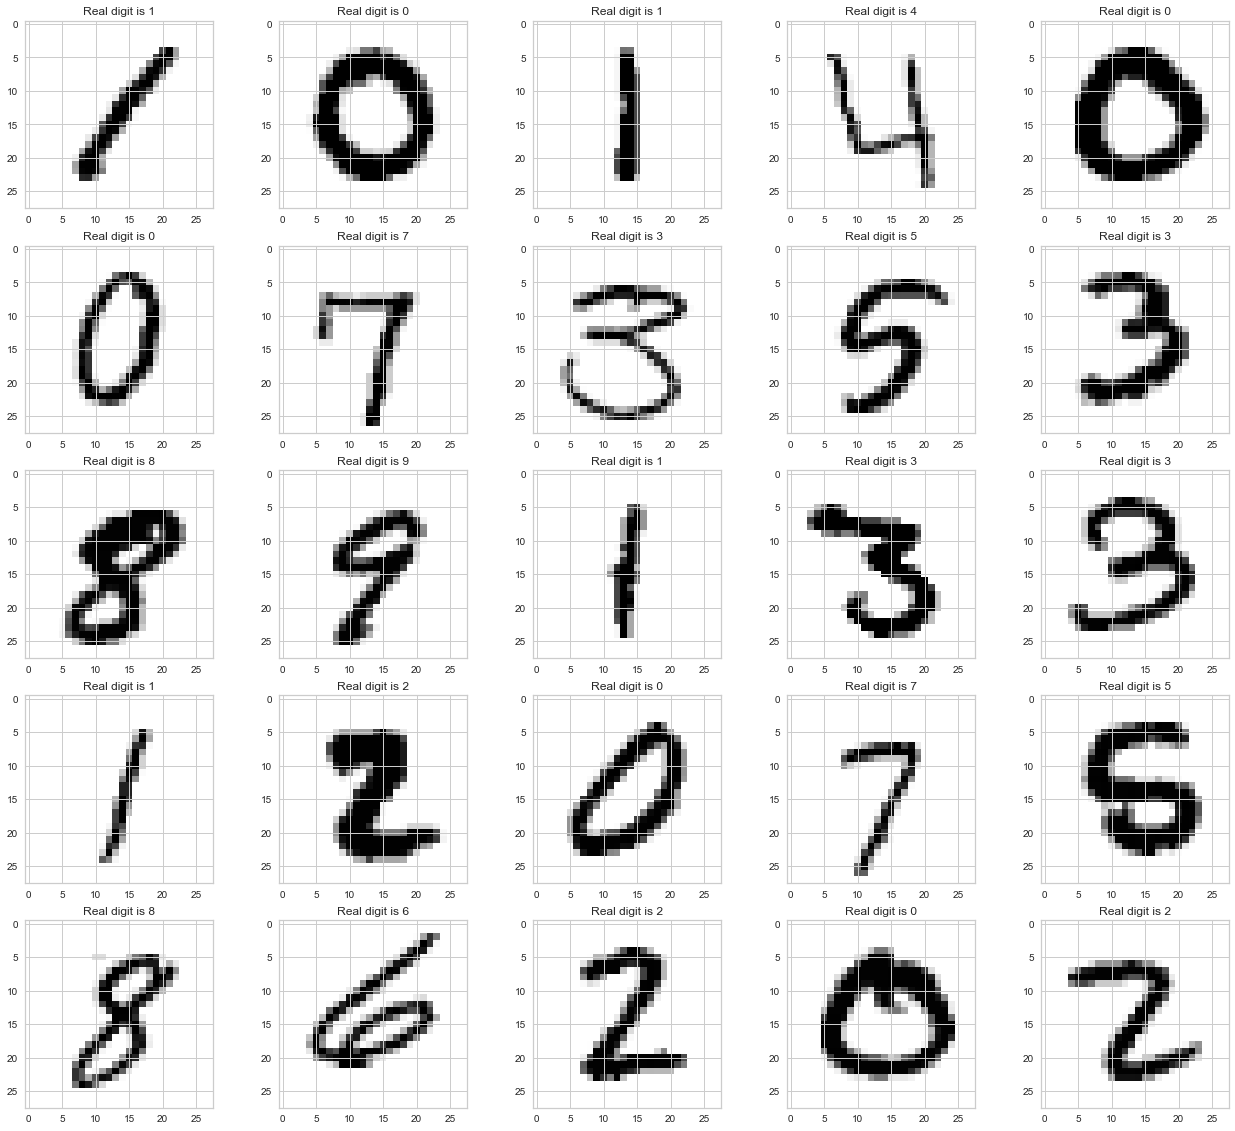

In [11]:
# Show 25 digits of data
fig, axis = plt.subplots(5, 5, figsize=(22, 20))

for i, ax in enumerate(axis.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='binary')
    ax.set(title = "Real digit is {}".format(y[i]))

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

# Random Forest

In [13]:
rf = RandomForestClassifier()
start = time.time()
rf.fit(X_train, y_train)
end= time.time()
# predict our file test data
rf_pred = rf.predict(X_test) 

In [14]:
print("Training took {:.2f}s".format(end-start))

Training took 16.74s


In [15]:
print("Random Forest accuracy is: {0:.3f}%".format(accuracy_score(y_test, rf_pred) * 100))

Random Forest accuracy is: 96.262%


In [16]:
rfc_preds = rf.predict(test_X)

In [17]:
#submit random forest
rf_submission = sample
rf_submission['Label'] = rfc_preds
submission_rf = pd.DataFrame(data=rf_submission)
submission_rf.to_csv('rf_submission.csv', index=False)

#### Kaggle ID: JThomas2020   Score: 0.96292

# Principle Component Analysis

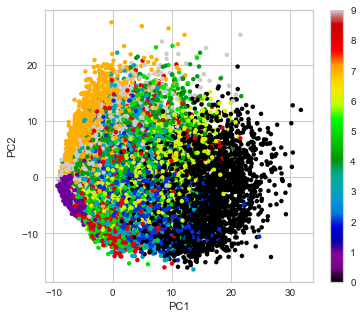

In [18]:
pca = PCA(n_components=2)
start=time.time()
pca.fit(X_scaled)
end=time.time()
transform = pca.transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(transform[:,0],transform[:,1], s=20, c = y, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [19]:
print("Training took {:.2f}s".format(end - start))

Training took 1.29s


In [20]:
n_components_array=([1,2,3,4,5,10,20,50,100,200,500])
vr = np.zeros(len(n_components_array))
i=0;
for n_components in n_components_array:
    pca = PCA(n_components=n_components)
    pca.fit(X_scaled)
    vr[i] = sum(pca.explained_variance_ratio_)
    i=i+1

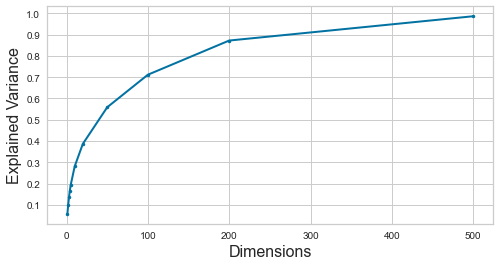

In [21]:
plt.figure(figsize = (8,4))
plt.plot(n_components_array,vr,'b.-', linewidth = 2)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.grid(True)
plt.xlabel("Dimensions",size=16)
plt.ylabel("Explained Variance",size=16)
plt.show()

In [22]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [23]:
pca.n_components_

153

In [24]:
np.sum(pca.explained_variance_ratio_)

0.950062384595934

95% of the variance is explained at 153 principal components

# RF + PCA

In [25]:
#Create Principal Components
pca = PCA(n_components=153)
start=time.time()
pca.fit(X)
end=time.time()
transform_train = pca.transform(X)
transform_test = pca.transform(test_X)

In [26]:
print("Training took {:.2f}s".format(end - start))

Training took 4.05s


In [27]:
rfc = RandomForestClassifier()
start=time.time()
rfc.fit(transform_train, y)
end=time.time()
results = rfc.predict(transform_test)

In [28]:
print("Training took {:.2f}s".format(end - start))

Training took 61.51s


Using 153 principal components the random forest classifier took 45 seconds to fit. This was sgnificantly longer than the original model. Approximately three times as long

In [29]:
#submit Random Forest PCA model
PCA_submission = sample
PCA_submission['Label'] = results
submission_pca = pd.DataFrame(data=PCA_submission)
submission_pca.to_csv('pca_submission.csv', index=False)

#### Kaggle ID: JThomas2020 Score:0.94442

## KMeans

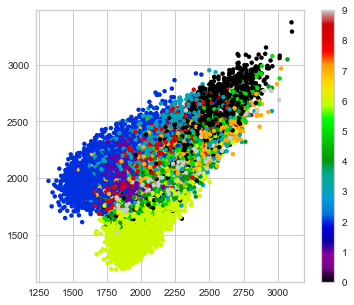

In [30]:
#create the Kmeans cluster
km = KMeans(n_clusters=10)
start=time.time()
km.fit(X)
end=time.time()
cluster = km.transform(X)

plt.figure(figsize=(6,5))
plt.scatter(cluster[:,0],cluster[:,1], s=20, c = y, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
plt.show()

In [31]:
print("Training took {:.2f}s".format(end - start))

Training took 17.10s


In [32]:
km = KMeans(n_clusters = 10, init = 'random', algorithm = 'full')

In [33]:
start = time.time()
y_pred = km.fit_predict(X)
end = time.time()
print("Training took {:.2f}s".format(end - start))

Training took 16.32s


In [34]:
print("KMeans Accuracy: {0:.3f}%".format(accuracy_score(y, y_pred) * 100))

KMeans Accuracy: 1.436%


In [35]:
km.inertia_

107176908217.17018

In [36]:
silhouette_score(X, km.labels_)

0.05868886218478397

The large inertia value indicates that the model is fit poorly into clusters. The low silhouette score indicated significant overlapping in the clusters as well.

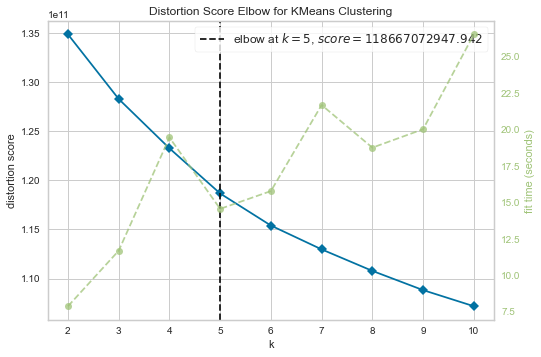

5
118667072947.9418


In [38]:
model = KElbowVisualizer(km)
model.fit(X)
model.show()
print(model.elbow_value_)
print(model.elbow_score_)

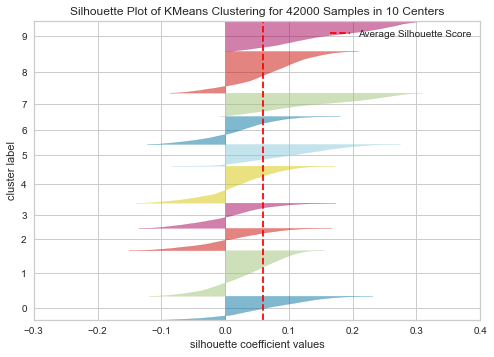

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 42000 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [39]:
# Instantiate the clustering model and visualizer
model = KMeans(10, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

# Fit the data to the visualizer
visualizer.fit(X)        
visualizer.show()

In [43]:
#submit KNearest Neighbor PCA model
y_pred = km.fit_predict(test_X)
KM_submission = sample
KM_submission['Label'] = y_pred
submission_km = pd.DataFrame(data=KM_submission)
submission_km.to_csv('km_submission.csv', index=False)

#### Kaggle ID: JThomas2020    Score: 0.09546

The model preformed poorly with 10 clusters. The cost of squared error identify that the optimal luster number may be four.

## KM + PCA

In [58]:
# Compute cluster centers and predict cluster indices
start = time.time()
pca_km = km.fit(transform_train)
end = time.time()
predictions = pca_km.predict(transform_train)

In [59]:
print("Training took {:.2f}s".format(end - start))

Training took 2.58s


In [60]:
print("KMeans Accuracy: {0:.3f}%".format(accuracy_score(y, predictions) * 100))

KMeans Accuracy: 15.369%


In [61]:
pca_km.inertia_

99930394912.45316

In [63]:
silhouette_score(transform_train, pca_km.labels_)

0.06559076752259396

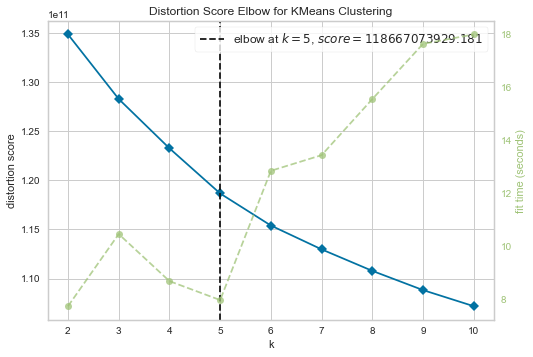

5
118667073929.18127


In [64]:
model = KElbowVisualizer(pca_km)
model.fit(X)
model.show()
print(model.elbow_value_)
print(model.elbow_score_)

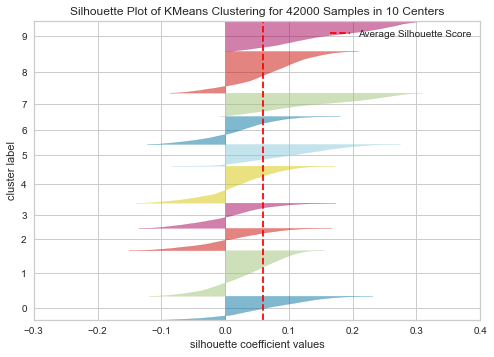

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 42000 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [65]:
# Instantiate the clustering model and visualizer
model = KMeans(10, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

# Fit the data to the visualizer
visualizer.fit(X)        
visualizer.show()

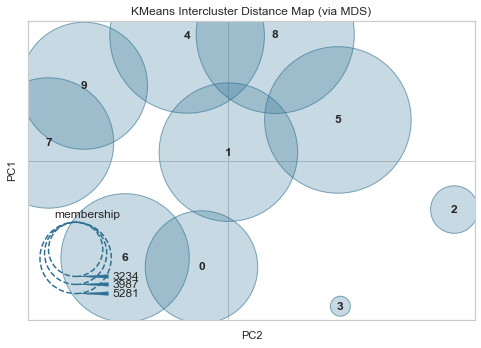

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [66]:
# Instantiate the clustering model and visualizer
model = km
visualizer = InterclusterDistance(model)

# Fit the data to the visualizer
visualizer.fit(X)        
visualizer.show()  

In [68]:
#submit KNearest Neighbor PCA model
predictions = pca_km.predict(test_X)
PCA_KM_submission = sample
PCA_KM_submission['Label'] = predictions
submission_pca_km = pd.DataFrame(data=PCA_KM_submission)
submission_pca_km.to_csv('pca_km_submission.csv', index=False)

#### Kaggle ID: JThomas2020 Score: 0.15292

The KMeans model performed slightly better by fitting the principal components. The model would perform better by fitting to fewer clusters. However, we know that there are 10 clusters for the numbers 0-9. Therefore, this method would be untenable. The random forest performed much better than the KMeans due to the nature of the KMeans algorithm. There were too many dimensions present in each image to separate the data into ten clusters properly. The random forest model performed well by splitting each of the decisions in the tree.